# Car Parts Dataset Example

This example show how to read this dataset, contained in the format of COCO Dataset, by using Python.

## Import libraries

In [7]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO

import skimage.io as io

## Dataset Exploration

**1) Initialize the COCO api for instance annotations**

In [10]:
data_dir='./testset'
annotation_file='{}/annotations.json'.format(data_dir)

coco=COCO(annotation_file)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


**2) Load the categories in a variable**

In [11]:
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

**3) Explore result of `cats`**

In [12]:
print('ID \t: Class Name')
print("-----------------")
for i in cats:
    print('{}\t: {}'.format(i['id'], i['name']))

ID 	: Class Name
-----------------
1	: _background_
2	: back_bumper
3	: back_glass
4	: back_left_door
5	: back_left_light
6	: back_right_door
7	: back_right_light
8	: front_bumper
9	: front_glass
10	: front_left_door
11	: front_left_light
12	: front_right_door
13	: front_right_light
14	: hood
15	: left_mirror
16	: right_mirror
17	: tailgate
18	: trunk
19	: wheel


**4) Load images**

In [13]:
imgIds = coco.getImgIds()
images = coco.loadImgs(imgIds)

**5) Pick one random image and its annotations**

In [14]:
random_imgId = imgIds[np.random.randint(0,len(imgIds))]
img = coco.loadImgs(random_imgId)[0]

In [20]:
img

{'id': 487,
 'dataset_id': 3,
 'category_ids': [],
 'path': 'JPEGImages/te83.jpg',
 'width': 1000,
 'height': 765,
 'file_name': 'te83.jpg',
 'annotated': False,
 'annotating': [],
 'num_annotations': 0,
 'metadata': {},
 'deleted': False,
 'milliseconds': 0,
 'events': [],
 'regenerate_thumbnail': False}

In [22]:
print(img['id'])
print(img['file_name'])

487
te83.jpg


**6) Show picked image**

In [16]:
I = io.imread('{}/{}'.format(data_dir,img['path']))/255.0

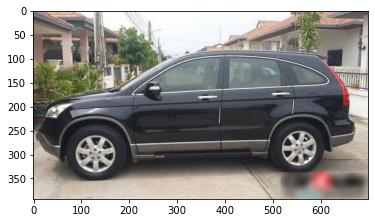

In [10]:
plt.imshow(I)

**7) Load its annotations and show picked image with overlay of annotation masks**

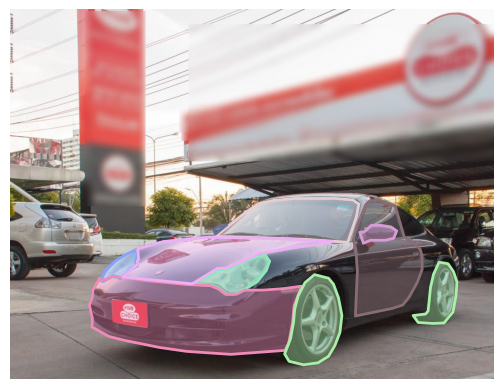

In [18]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')

annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [19]:
annIds

[3305, 3306, 3307, 3308, 3309, 3310, 3311, 3894, 3954]

**Data in variable `anns`**

In [12]:
anns

[{'id': 3206,
  'image_id': 494,
  'category_id': 15,
  'segmentation': [[229.3,
    175.0,
    244.2,
    177.0,
    265.3,
    175.7,
    264.6,
    147.8,
    255.8,
    146.4,
    240.8,
    149.1]],
  'area': 857,
  'bbox': [230.0, 146.0, 35.0, 31.0],
  'iscrowd': False,
  'isbbox': False,
  'color': '#f33829',
  'metadata': {}},
 {'id': 3207,
  'image_id': 494,
  'category_id': 10,
  'segmentation': [[209.5,
    186.5,
    207.5,
    237.6,
    210.2,
    260.0,
    215.0,
    278.4,
    222.4,
    298.1,
    333.3,
    295.4,
    378.2,
    293.3,
    392.5,
    291.3,
    392.5,
    223.3,
    401.4,
    92.7,
    375.5,
    93.3,
    346.3,
    96.7,
    317.0,
    102.2,
    292.5,
    112.4,
    261.2,
    130.1,
    218.4,
    161.4,
    216.3,
    172.9]],
  'area': 33090,
  'bbox': [208.0, 93.0, 193.0, 205.0],
  'iscrowd': False,
  'isbbox': False,
  'color': '#5d17fd',
  'metadata': {}},
 {'id': 3208,
  'image_id': 494,
  'category_id': 11,
  'segmentation': [[25.9,
    

**7) Get the annotation categories of picked image**

In [13]:
picked_image_annIDs = [i['category_id'] for i in anns]
picked_image_cats = coco.loadCats(picked_image_annIDs)

In [14]:
print('ID \t: Class Name')
print("-----------------")
for i in picked_image_cats:
    print('{} \t: {}'.format(i['id'], i['name']))

ID 	: Class Name
-----------------
15 	: left_mirror
10 	: front_left_door
11 	: front_left_light
19 	: wheel
4 	: back_left_door


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms as T
from torch.utils.data import DataLoader, random_split
#
import PIL
from PIL import Image
#
from cargar_dataset import carga_carDataset
from models.UnetModelMultiClass import *
from utilidades.utilidades import accuracy